data : https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, f1_score

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Data

In [2]:
telco=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


* customerID = Customer ID

* gender = Whether the customer is a male or a female

* SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)

* Partner = Whether the customer has a partner or not (Yes, No)

* Dependents = Whether the customer has dependents or not (Yes, No)

* tenure = Number of months the customer has stayed with the company

* PhoneService = Whether the customer has a phone service or not (Yes, No)

* MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)

* InternetService = Customer’s internet service provider (DSL, Fiber optic, No)

* OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)

In [4]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco.drop(columns=('customerID'),axis=1, inplace=True)

In [7]:
telco['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
19.9       8
19.65      8
          ..
740.8      1
189.1      1
3865.6     1
604.7      1
79.1       1
Name: TotalCharges, Length: 6531, dtype: int64

ini ternyata ada yg missing value, tapi kayanya karna itu spasi jadi dianggap ada isi datanya pas di value_counts. jadi ini bakal direplace aja diisi jadi 0. trus format TotalCharge diubah jadi float

In [8]:
telco['TotalCharges'] = telco['TotalCharges'].replace(' ', 0)

In [9]:
telco['TotalCharges']=pd.to_numeric(telco['TotalCharges'])

In [10]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# EDA sederhana tiap Feature

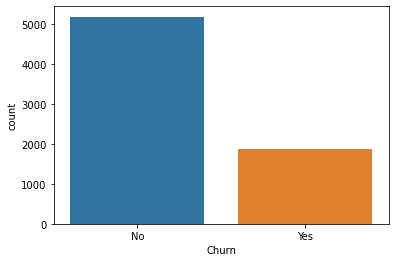

In [11]:
sns.countplot(data=telco, x='Churn')
plt.show()

In [12]:
telco['Churn'].value_counts()/telco['Churn'].value_counts().sum()*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Target: Churn
* Pengguna yg Churn berkisar 26.54% dari keseluruhan data
* Pengguna yg tidak Churn berkisar 73.46% dari keseluruhan data

## by Gender

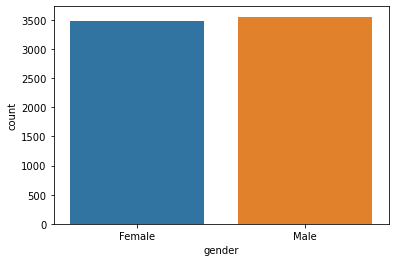

In [13]:
sns.countplot(data=telco, x='gender')
plt.show()

In [14]:
telco['gender'].value_counts()/telco['Churn'].value_counts().sum()*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

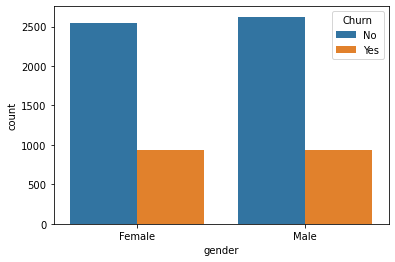

In [15]:
sns.countplot(data=telco, x='gender', hue='Churn')
plt.show()

In [16]:
telco[['gender','Churn']].value_counts()

gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
dtype: int64

In [17]:
(telco[['gender','Churn']].value_counts()[2]/(telco[['gender','Churn']].value_counts()[1]+telco[['gender','Churn']].value_counts()[2]))*100

26.920871559633024

In [18]:
(telco[['gender','Churn']].value_counts()[3]/(telco[['gender','Churn']].value_counts()[0]+telco[['gender','Churn']].value_counts()[3]))*100

26.160337552742618

* Pengguna dengan `gender Male` sekitar 50.47% dari data keseluruhan, dan sekitar 26.16% nya adalah pengguna yg Churn.

* Pengguna dengan `gender Female` sekitar 49.52% dari data, dan sekitar 26.92% nya adalah pengguna yg Churn.

* Perbandingan gender overall dan perbandingan gender yg Churn atau tidak ratenya hampir saling sama.

Dapat dikatakan `gender` sepertinya **tidak terlalu memengaruhi** Churn suatu konsumen.

## by SeniorCitizen

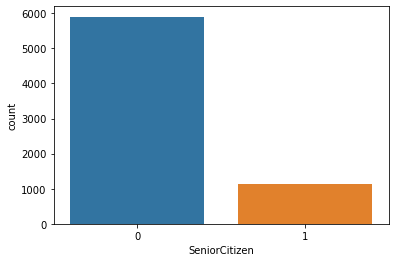

In [19]:
sns.countplot(data=telco, x='SeniorCitizen')
plt.show()

In [20]:
telco['SeniorCitizen'].value_counts()/telco['SeniorCitizen'].value_counts().sum()*100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

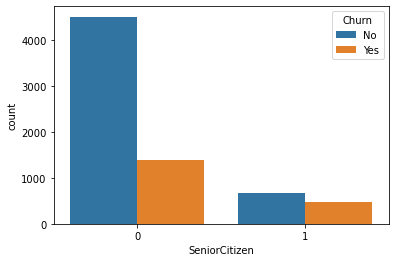

In [21]:
sns.countplot(data=telco, x='SeniorCitizen', hue='Churn')
plt.show()

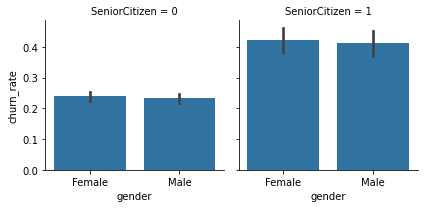

In [22]:
telco['churn_rate'] = np.where(telco['Churn']=='Yes',1,0)
grid = sns.FacetGrid(telco, col='SeniorCitizen')
ax = grid.map(sns.barplot, 'gender', 'churn_rate', order= ['Female', 'Male'])

In [23]:
telco[['SeniorCitizen','Churn']].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64

In [24]:
(telco[['SeniorCitizen','Churn']].value_counts()[1][1]/(telco[['SeniorCitizen','Churn']].value_counts()[1][0]+telco[['SeniorCitizen','Churn']].value_counts()[1][1]))*100

41.68126094570928

In [25]:
(telco[['SeniorCitizen','Churn']].value_counts()[0][1]/(telco[['SeniorCitizen','Churn']].value_counts()[0][0]+telco[['SeniorCitizen','Churn']].value_counts()[0][1]))*100

23.606168446026096

* Pengguna yg `bukan merupakan SeniorCitizen` sekitar 83.78% dari data keseluruhan, dan sekitar 23.6% nya adalah pengguna yg Churn. 

* Pengguna yg `merupakan SeniorCitizen` sekitar 16.21% dari data keseluruhan, dan sekitar 41.7% nya adalah pengguna yg Churn.

Dapat dikatakan `SeniorCitizen` **jauh lebih memungkinkan** untuk Churn dibanding non SeniorCitizen

## by Partner

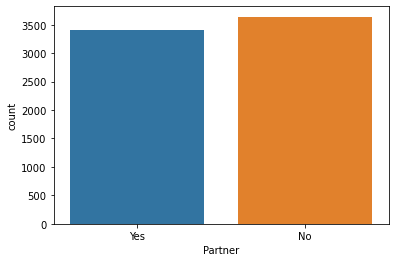

In [26]:
sns.countplot(data=telco, x='Partner')
plt.show()

In [27]:
telco['Partner'].value_counts()/telco['Partner'].value_counts().sum()*100

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

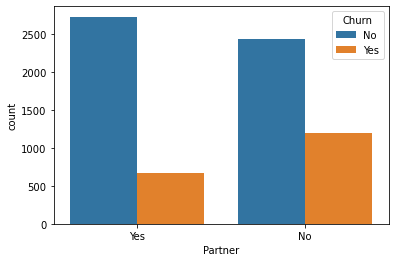

In [28]:
sns.countplot(data=telco, x='Partner', hue='Churn')
plt.show()

In [29]:
telco[['Partner','Churn']].value_counts()

Partner  Churn
Yes      No       2733
No       No       2441
         Yes      1200
Yes      Yes       669
dtype: int64

In [30]:
(telco[['Partner','Churn']].value_counts()[2]/(telco[['Partner','Churn']].value_counts()[1]+telco[['Partner','Churn']].value_counts()[2]))*100

32.95797857731392

In [31]:
(telco[['Partner','Churn']].value_counts()[3]/(telco[['Partner','Churn']].value_counts()[0]+telco[['Partner','Churn']].value_counts()[3]))*100

19.66490299823633

* Pengguna yg `tidak memiliki Partner` sekitar 51.69% dari data keseluruhan, dan sekitar 32.96% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki Partner` sekitar 48.30% dari data keseluruhan, dan sekitar 19.66% nya adalah pengguna yg Churn.

Dapat dikatakan `Pengguna yg tidak memiliki partner` **lebih memungkinkan** untuk Churn dibanding Pengguna yg memiliki partner.

## by Dependents

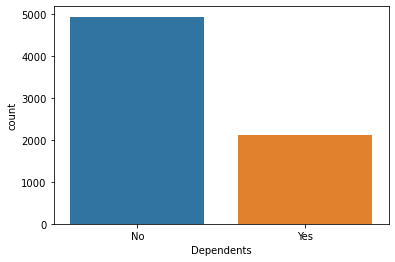

In [32]:
sns.countplot(data=telco, x='Dependents')
plt.show()

In [33]:
telco['Dependents'].value_counts()/telco['Dependents'].value_counts().sum()*100

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

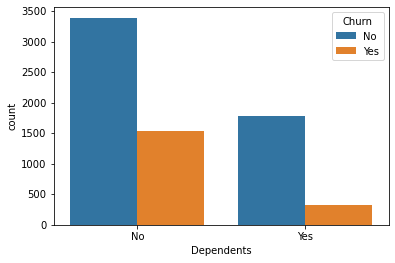

In [34]:
sns.countplot(data=telco, x='Dependents', hue='Churn')
plt.show()

In [35]:
telco[['Dependents','Churn']].value_counts()

Dependents  Churn
No          No       3390
Yes         No       1784
No          Yes      1543
Yes         Yes       326
dtype: int64

In [36]:
(telco[['Dependents','Churn']].value_counts()[2]/(telco[['Dependents','Churn']].value_counts()[0]+telco[['Dependents','Churn']].value_counts()[2]))*100

31.279140482465028

In [37]:
(telco[['Dependents','Churn']].value_counts()[3]/(telco[['Dependents','Churn']].value_counts()[1]+telco[['Dependents','Churn']].value_counts()[3]))*100

15.450236966824646

* Pengguna yg `tidak memiliki Dependents` sekitar 70.04% dari data keseluruhan, dan sekitar 31.28% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki Dependents` sekitar 29.96% dari data keseluruhan, dan sekitar 15.45% nya adalah pengguna yg Churn.

Dapat dikatakan `Pengguna yg tidak memiliki Dependents` **lebih memungkinkan** untuk Churn dibanding Pengguna yg memiliki Dependents.

## by PhoneService

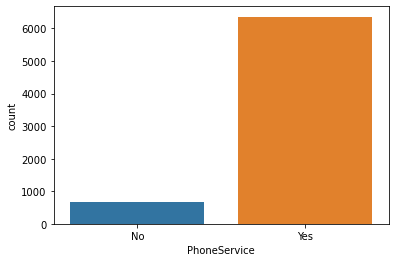

In [38]:
sns.countplot(data=telco, x='PhoneService')
plt.show()

In [39]:
telco['PhoneService'].value_counts()/telco['PhoneService'].value_counts().sum()*100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

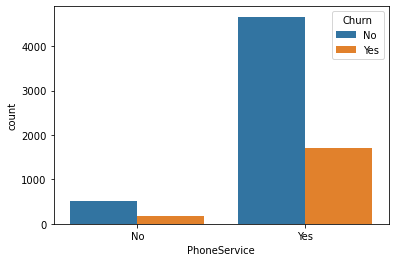

In [40]:
sns.countplot(data=telco, x='PhoneService', hue='Churn')
plt.show()

In [41]:
telco[['PhoneService','Churn']].value_counts()

PhoneService  Churn
Yes           No       4662
              Yes      1699
No            No        512
              Yes       170
dtype: int64

In [42]:
(telco[['PhoneService','Churn']].value_counts()[1]/(telco[['PhoneService','Churn']].value_counts()[0]+telco[['PhoneService','Churn']].value_counts()[1]))*100

26.70963684955196

In [43]:
(telco[['PhoneService','Churn']].value_counts()[3]/(telco[['PhoneService','Churn']].value_counts()[2]+telco[['PhoneService','Churn']].value_counts()[3]))*100

24.926686217008797

* Pengguna yg `memiliki PhoneService` sekitar 90.32% dari data keseluruhan, dan sekitar 26.7% nya adalah pengguna yg Churn.
* Pengguna yg `tidak memiliki PhoneService` sekitar 9.68% dari data keseluruhan, dan sekitar 26.93% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur dengan PhoneService, sedangkan di sisi lain `PhoneService` sepertinya **tidak terlalu memengaruhi** Churn suatu konsumen.

## by MultipleLines

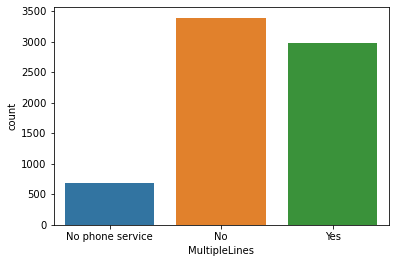

In [44]:
sns.countplot(data=telco, x='MultipleLines')
plt.show()

In [45]:
telco['MultipleLines'].value_counts()/telco['MultipleLines'].value_counts().sum()*100

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

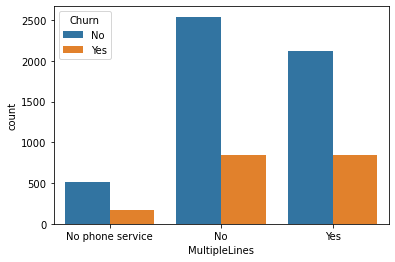

In [46]:
sns.countplot(data=telco, x='MultipleLines', hue='Churn')
plt.show()

In [47]:
telco[['MultipleLines','Churn']].value_counts()

MultipleLines     Churn
No                No       2541
Yes               No       2121
                  Yes       850
No                Yes       849
No phone service  No        512
                  Yes       170
dtype: int64

In [48]:
(telco[['MultipleLines','Churn']].value_counts()[3]/(telco[['MultipleLines','Churn']].value_counts()[0]+telco[['MultipleLines','Churn']].value_counts()[3]))*100

25.04424778761062

In [49]:
(telco[['MultipleLines','Churn']].value_counts()[2]/(telco[['MultipleLines','Churn']].value_counts()[1]+telco[['MultipleLines','Churn']].value_counts()[2]))*100

28.6098956580276

In [50]:
(telco[['MultipleLines','Churn']].value_counts()[5]/(telco[['MultipleLines','Churn']].value_counts()[4]+telco[['MultipleLines','Churn']].value_counts()[5]))*100

24.926686217008797

* Pengguna yg `tidak memiliki MultipleLines` sekitar 48.13% dari data keseluruhan, dan sekitar 25.04% nya dalah pengguna yg Churn.
* Pengguna yg `memiliki MultipleLines` sekitar 42.18% dari data keseluruhan, dan sekitar 28.6% nya dalah pengguna yg Churn.
* Pengguna yg `no phone service` sekitar 9.68% dari data keseluruhan, dan sekitar 24.93% nya dalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur tanpa MultipleLines, sedangkan di sisi lain  `Pengguna yg memiliki MultipleLines` **sedikit lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by InternetService

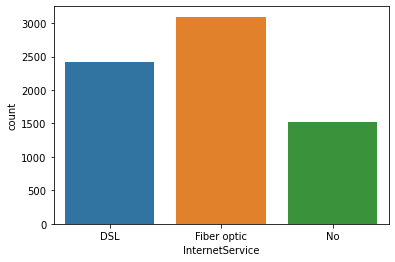

In [51]:
sns.countplot(data=telco, x='InternetService')
plt.show()

In [52]:
telco['InternetService'].value_counts()/telco['InternetService'].value_counts().sum()*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

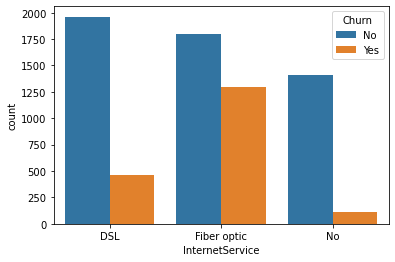

In [53]:
sns.countplot(data=telco, x='InternetService', hue='Churn')
plt.show()

In [54]:
telco[['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       1962
Fiber optic      No       1799
No               No       1413
Fiber optic      Yes      1297
DSL              Yes       459
No               Yes       113
dtype: int64

In [55]:
(telco[['InternetService','Churn']].value_counts()[3]/(telco[['InternetService','Churn']].value_counts()[1]+telco[['InternetService','Churn']].value_counts()[3]))*100

41.89276485788114

In [56]:
(telco[['InternetService','Churn']].value_counts()[4]/(telco[['InternetService','Churn']].value_counts()[0]+telco[['InternetService','Churn']].value_counts()[4]))*100

18.95910780669145

In [57]:
(telco[['InternetService','Churn']].value_counts()[5]/(telco[['InternetService','Churn']].value_counts()[2]+telco[['InternetService','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `InternetService menggunakan Fiber Optic` sekitar 43.96% dari data keseluruhan, dan sekitar 41.89% nya dalah pengguna yg Churn.
* Pengguna yg `InternetService menggunakan DSL` sekitar 34.37% dari data keseluruhan, dan sekitar 18.96% nya dalah pengguna yg Churn.
* Pengguna yg `tanpa InternetService` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya dalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai InternetService menggunakan Fiber Optic, sedangkan di sisi lain  `Pengguna yg memiliki InternetService dengan Fiber Optic` **sangat jauh lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by OnlineSecurity

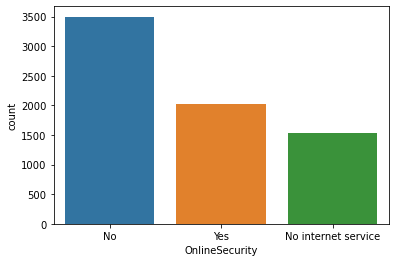

In [58]:
sns.countplot(data=telco, x='OnlineSecurity')
plt.show()

In [59]:
telco['OnlineSecurity'].value_counts()/telco['OnlineSecurity'].value_counts().sum()*100

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

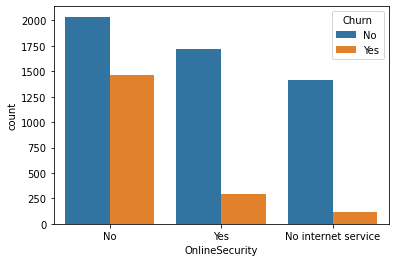

In [60]:
sns.countplot(data=telco, x='OnlineSecurity', hue='Churn')
plt.show()

In [61]:
telco[['OnlineSecurity','Churn']].value_counts()

OnlineSecurity       Churn
No                   No       2037
Yes                  No       1724
No                   Yes      1461
No internet service  No       1413
Yes                  Yes       295
No internet service  Yes       113
dtype: int64

In [62]:
(telco[['OnlineSecurity','Churn']].value_counts()[4]/(telco[['OnlineSecurity','Churn']].value_counts()[1]+telco[['OnlineSecurity','Churn']].value_counts()[4]))*100

14.611193660227837

In [63]:
(telco[['OnlineSecurity','Churn']].value_counts()[2]/(telco[['OnlineSecurity','Churn']].value_counts()[0]+telco[['OnlineSecurity','Churn']].value_counts()[2]))*100

41.76672384219554

In [64]:
(telco[['OnlineSecurity','Churn']].value_counts()[5]/(telco[['OnlineSecurity','Churn']].value_counts()[3]+telco[['OnlineSecurity','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki OnlineSecurity` sekitar 49.67% dari data keseluruhan, dan sekitar 14.61% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki OnlineSecurity` sekitar 28.67% dari data keseluruhan, dan sekitar 41.77% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur tanpa OnlineSecurity, sedangkan di sisi lain `Pengguna yg memiliki OnlineSecurity` **sangat jauh lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by OnlineBackup

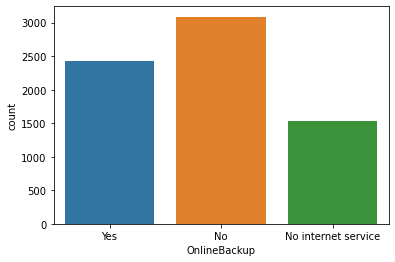

In [65]:
sns.countplot(data=telco, x='OnlineBackup')
plt.show()

In [66]:
telco['OnlineBackup'].value_counts()/telco['OnlineBackup'].value_counts().sum()*100

No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64

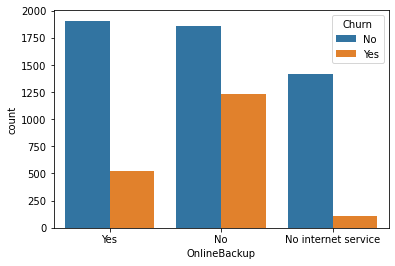

In [67]:
sns.countplot(data=telco, x='OnlineBackup', hue='Churn')
plt.show()

In [68]:
telco[['OnlineBackup','Churn']].value_counts()

OnlineBackup         Churn
Yes                  No       1906
No                   No       1855
No internet service  No       1413
No                   Yes      1233
Yes                  Yes       523
No internet service  Yes       113
dtype: int64

In [69]:
(telco[['OnlineBackup','Churn']].value_counts()[4]/(telco[['OnlineBackup','Churn']].value_counts()[0]+telco[['OnlineBackup','Churn']].value_counts()[4]))*100

21.531494442157268

In [70]:
(telco[['OnlineBackup','Churn']].value_counts()[3]/(telco[['OnlineBackup','Churn']].value_counts()[1]+telco[['OnlineBackup','Churn']].value_counts()[3]))*100

39.92875647668394

In [71]:
(telco[['OnlineBackup','Churn']].value_counts()[5]/(telco[['OnlineBackup','Churn']].value_counts()[2]+telco[['OnlineBackup','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki OnlineBackup` sekitar 43.84% dari data keseluruhan, dan sekitar 21.53% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki OnlineBackup` sekitar 34.49% dari data keseluruhan, dan sekitar 39.93% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur tanpa OnlineBackup, sedangkan di sisi lain `Pengguna yg memiliki OnlineBackup` **jauh lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by DeviceProtection

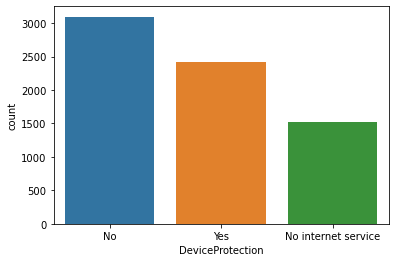

In [72]:
sns.countplot(data=telco, x='DeviceProtection')
plt.show()

In [73]:
telco['DeviceProtection'].value_counts()/telco['DeviceProtection'].value_counts().sum()*100

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

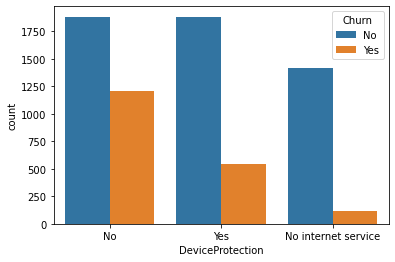

In [74]:
sns.countplot(data=telco, x='DeviceProtection', hue='Churn')
plt.show()

In [75]:
telco[['DeviceProtection','Churn']].value_counts()

DeviceProtection     Churn
No                   No       1884
Yes                  No       1877
No internet service  No       1413
No                   Yes      1211
Yes                  Yes       545
No internet service  Yes       113
dtype: int64

In [76]:
(telco[['DeviceProtection','Churn']].value_counts()[4]/(telco[['DeviceProtection','Churn']].value_counts()[1]+telco[['DeviceProtection','Churn']].value_counts()[4]))*100

22.50206440957886

In [77]:
(telco[['DeviceProtection','Churn']].value_counts()[3]/(telco[['DeviceProtection','Churn']].value_counts()[0]+telco[['DeviceProtection','Churn']].value_counts()[3]))*100

39.127625201938606

In [78]:
(telco[['DeviceProtection','Churn']].value_counts()[5]/(telco[['DeviceProtection','Churn']].value_counts()[2]+telco[['DeviceProtection','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki DeviceProtection` sekitar 43.94% dari data keseluruhan, dan sekitar 22.5% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki DeviceProtection` sekitar 34.39% dari data keseluruhan, dan sekitar 39.13% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur tanpa DeviceProtection, sedangkan di sisi lain `Pengguna yg memiliki DeviceProtection` **jauh lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by TechSupport

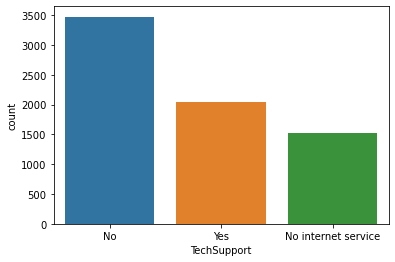

In [79]:
sns.countplot(data=telco, x='TechSupport')
plt.show()

In [80]:
telco['TechSupport'].value_counts()/telco['TechSupport'].value_counts().sum()*100

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

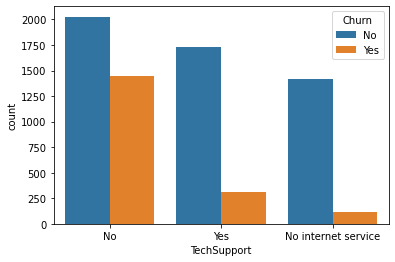

In [81]:
sns.countplot(data=telco, x='TechSupport', hue='Churn')
plt.show()

In [82]:
telco[['TechSupport','Churn']].value_counts()

TechSupport          Churn
No                   No       2027
Yes                  No       1734
No                   Yes      1446
No internet service  No       1413
Yes                  Yes       310
No internet service  Yes       113
dtype: int64

In [83]:
(telco[['TechSupport','Churn']].value_counts()[4]/(telco[['TechSupport','Churn']].value_counts()[1]+telco[['TechSupport','Churn']].value_counts()[4]))*100

15.166340508806261

In [84]:
(telco[['TechSupport','Churn']].value_counts()[2]/(telco[['TechSupport','Churn']].value_counts()[0]+telco[['TechSupport','Churn']].value_counts()[2]))*100

41.63547365390153

In [85]:
(telco[['TechSupport','Churn']].value_counts()[5]/(telco[['TechSupport','Churn']].value_counts()[3]+telco[['TechSupport','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki TechSupport` sekitar 49.31% dari data keseluruhan, dan sekitar 15.16% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki TechSupport` sekitar 29.02% dari data keseluruhan, dan sekitar 41.63% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur tanpa TechSupport, sedangkan di sisi lain `Pengguna yg memiliki TechSupport` **sangat jauh lebih memungkinkan** untuk Churn dibanding Pengguna yg tidak memiliki TechSupport ataupun Pengguna yg TechSupport no internet service.

## by StreamingTV

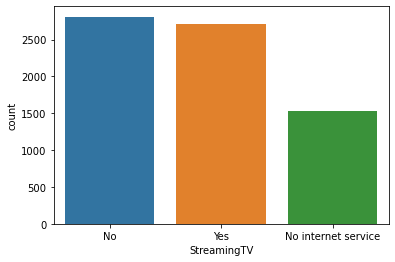

In [86]:
sns.countplot(data=telco, x='StreamingTV')
plt.show()

In [87]:
telco['StreamingTV'].value_counts()/telco['StreamingTV'].value_counts().sum()*100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

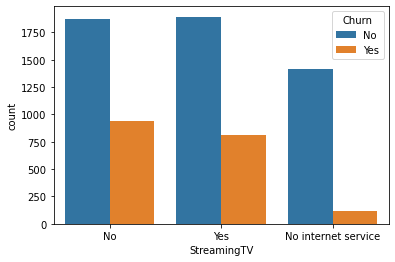

In [88]:
sns.countplot(data=telco, x='StreamingTV', hue='Churn')
plt.show()

In [89]:
telco[['StreamingTV','Churn']].value_counts()

StreamingTV          Churn
Yes                  No       1893
No                   No       1868
No internet service  No       1413
No                   Yes       942
Yes                  Yes       814
No internet service  Yes       113
dtype: int64

In [90]:
(telco[['StreamingTV','Churn']].value_counts()[4]/(telco[['StreamingTV','Churn']].value_counts()[0]+telco[['StreamingTV','Churn']].value_counts()[4]))*100

30.070188400443293

In [91]:
(telco[['StreamingTV','Churn']].value_counts()[3]/(telco[['StreamingTV','Churn']].value_counts()[1]+telco[['StreamingTV','Churn']].value_counts()[3]))*100

33.52313167259787

In [92]:
(telco[['StreamingTV','Churn']].value_counts()[5]/(telco[['StreamingTV','Churn']].value_counts()[2]+telco[['StreamingTV','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki StreamingTV` sekitar 39.89% dari data keseluruhan, dan sekitar 30.07% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki StreamingTV` sekitar 38.43% dari data keseluruhan, dan sekitar 33.52% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan Fitur StreamingTV cukup berimbang antara pengguna yg memilikinya dengan pengguna yg tidak memilikinya, sedangkan di sisi lain `Pengguna yg memiliki StreamingTV` **sedikit lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by StreamingMovies

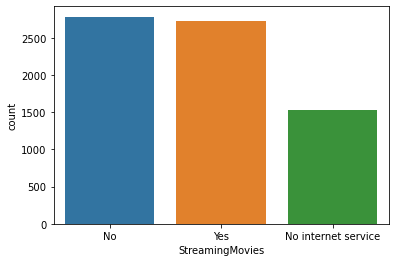

In [93]:
sns.countplot(data=telco, x='StreamingMovies')
plt.show()

In [94]:
telco['StreamingMovies'].value_counts()/telco['StreamingMovies'].value_counts().sum()*100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

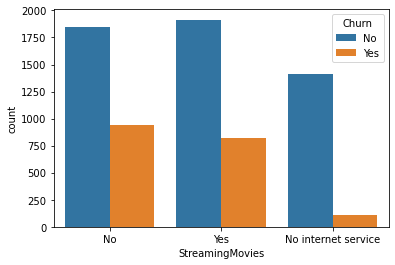

In [95]:
sns.countplot(data=telco, x='StreamingMovies', hue='Churn')
plt.show()

In [96]:
telco[['StreamingMovies','Churn']].value_counts()

StreamingMovies      Churn
Yes                  No       1914
No                   No       1847
No internet service  No       1413
No                   Yes       938
Yes                  Yes       818
No internet service  Yes       113
dtype: int64

In [97]:
(telco[['StreamingMovies','Churn']].value_counts()[4]/(telco[['StreamingMovies','Churn']].value_counts()[0]+telco[['StreamingMovies','Churn']].value_counts()[4]))*100

29.941434846266475

In [98]:
(telco[['StreamingMovies','Churn']].value_counts()[3]/(telco[['StreamingMovies','Churn']].value_counts()[1]+telco[['StreamingMovies','Churn']].value_counts()[3]))*100

33.680430879712745

In [99]:
(telco[['StreamingMovies','Churn']].value_counts()[5]/(telco[['StreamingMovies','Churn']].value_counts()[2]+telco[['StreamingMovies','Churn']].value_counts()[5]))*100

7.404980340760157

* Pengguna yg `tidak memiliki StreamingMovies` sekitar 39.54% dari data keseluruhan, dan sekitar 29.94% nya adalah pengguna yg Churn.
* Pengguna yg `memiliki StreamingMovies` sekitar 38.79% dari data keseluruhan, dan sekitar 33.68% nya adalah pengguna yg Churn.
* Pengguna yg `no internet service` sekitar 21.67% dari data keseluruhan, dan sekitar 7.4% nya adalah pengguna yg Churn.

Dapat dikatakan Fitur StreamingMovies cukup berimbang antara pengguna yg memiliki dengan pengguna yg tidak memiliki, sedangkan di sisi lain `Pengguna yg memiliki StreamingMovies` **sedikit lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by Contract

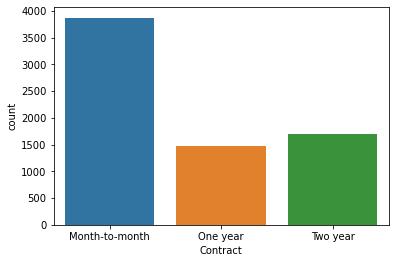

In [100]:
sns.countplot(data=telco, x='Contract')
plt.show()

In [101]:
telco['Contract'].value_counts()/telco['Contract'].value_counts().sum()*100

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

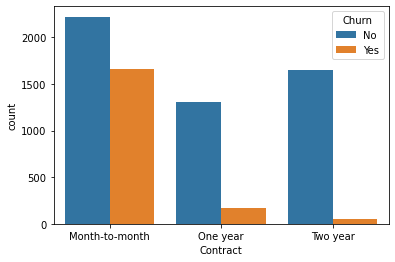

In [102]:
sns.countplot(data=telco, x='Contract', hue='Churn')
plt.show()

In [103]:
telco[['Contract','Churn']].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1647
One year        No       1307
                Yes       166
Two year        Yes        48
dtype: int64

In [104]:
(telco[['Contract','Churn']].value_counts()[1]/(telco[['Contract','Churn']].value_counts()[0]+telco[['Contract','Churn']].value_counts()[1]))*100

42.70967741935484

In [105]:
(telco[['Contract','Churn']].value_counts()[4]/(telco[['Contract','Churn']].value_counts()[3]+telco[['Contract','Churn']].value_counts()[4]))*100

11.269517990495586

In [106]:
(telco[['Contract','Churn']].value_counts()[5]/(telco[['Contract','Churn']].value_counts()[2]+telco[['Contract','Churn']].value_counts()[5]))*100

2.831858407079646

* Pengguna dengan `masa kontrak Month-to-month` sekitar 55.02% dari data keseluruhan, dan sekitar 42.71% nya adalah pengguna yg Churn.
* Pengguna dengan `masa kontrak Two year` sekitar 24.07% dari data keseluruhan, dan sekitar 11.27% nya adalah pengguna yg Churn.
* Pengguna dengan `masa kontrak One year` sekitar 20.91% dari data keseluruhan, dan sekitar 2.83% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur masa kontrak Month-to-month, sedangkan di sisi lain pengguna dengan `masa kontrak Month-to-month` **sangat jauh lebih memungkinkan** untuk Churn dibanding pengguna dengan opsi masa kontrak lainnya.

## by PaperlessBilling

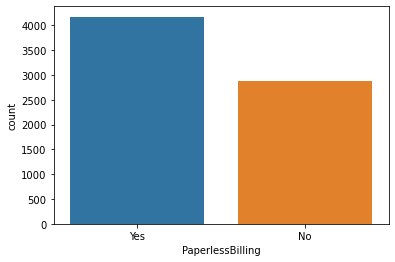

In [107]:
sns.countplot(data=telco, x='PaperlessBilling')
plt.show()

In [108]:
telco['PaperlessBilling'].value_counts()/telco['PaperlessBilling'].value_counts().sum()*100

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

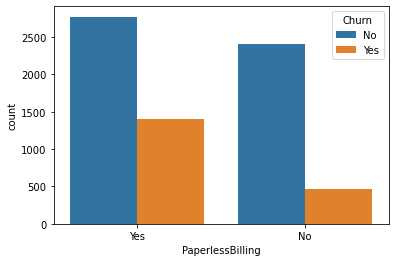

In [109]:
sns.countplot(data=telco, x='PaperlessBilling', hue='Churn')
plt.show()

In [110]:
telco[['PaperlessBilling','Churn']].value_counts()

PaperlessBilling  Churn
Yes               No       2771
No                No       2403
Yes               Yes      1400
No                Yes       469
dtype: int64

In [111]:
(telco[['PaperlessBilling','Churn']].value_counts()[2]/(telco[['PaperlessBilling','Churn']].value_counts()[0]+telco[['PaperlessBilling','Churn']].value_counts()[2]))*100

33.565092304003834

In [112]:
(telco[['PaperlessBilling','Churn']].value_counts()[3]/(telco[['PaperlessBilling','Churn']].value_counts()[2]+telco[['PaperlessBilling','Churn']].value_counts()[3]))*100

25.0936329588015

* Pengguna yg `dengan PaperlessBilling` sekitar 59.22% dari data keseluruhan, dan sekitar 33.56% nya adalah pengguna yg Churn.
* Pengguna yg `bukan dengan PaperlessBilling` sekitar 40.78% dari data keseluruhan, dan sekitar 25.09% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur dengan PaperlessBilling, sedangkan di sisi lain metode `dengan PaperlessBilling` **lebih memungkinkan** untuk Churn dibanding pengguna lainnya.

## by PaymentMethod

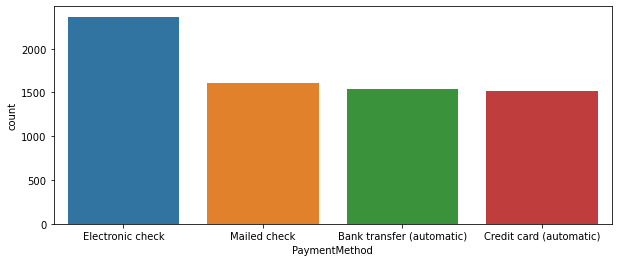

In [113]:
plt.figure(figsize=(10,4))
sns.countplot(data=telco, x='PaymentMethod')
plt.show()

In [114]:
telco['PaymentMethod'].value_counts()/telco['PaymentMethod'].value_counts().sum()*100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

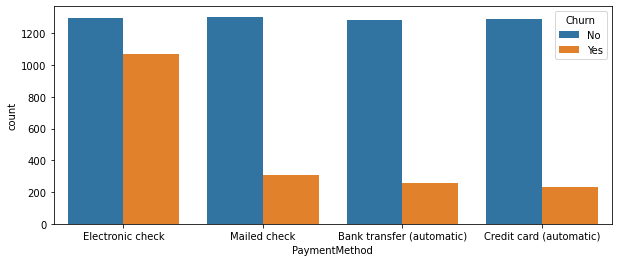

In [115]:
plt.figure(figsize=(10,4))
sns.countplot(data=telco, x='PaymentMethod', hue='Churn')
plt.show()

In [116]:
telco[['PaymentMethod','Churn']].value_counts()

PaymentMethod              Churn
Mailed check               No       1304
Electronic check           No       1294
Credit card (automatic)    No       1290
Bank transfer (automatic)  No       1286
Electronic check           Yes      1071
Mailed check               Yes       308
Bank transfer (automatic)  Yes       258
Credit card (automatic)    Yes       232
dtype: int64

In [117]:
(telco[['PaymentMethod','Churn']].value_counts()[4]/(telco[['PaymentMethod','Churn']].value_counts()[1]+telco[['PaymentMethod','Churn']].value_counts()[4]))*100

45.28541226215645

In [118]:
(telco[['PaymentMethod','Churn']].value_counts()[5]/(telco[['PaymentMethod','Churn']].value_counts()[0]+telco[['PaymentMethod','Churn']].value_counts()[5]))*100

19.106699751861044

In [119]:
(telco[['PaymentMethod','Churn']].value_counts()[6]/(telco[['PaymentMethod','Churn']].value_counts()[3]+telco[['PaymentMethod','Churn']].value_counts()[6]))*100

16.709844559585495

In [120]:
(telco[['PaymentMethod','Churn']].value_counts()[7]/(telco[['PaymentMethod','Churn']].value_counts()[2]+telco[['PaymentMethod','Churn']].value_counts()[7]))*100

15.243101182654403

* Pengguna yg `PaymentMethod dengan Electronic check` sekitar 33.58% dari data keseluruhan, dan sekitar 45.28% nya adalah pengguna yg Churn.
* Pengguna yg `PaymentMethod dengan Mailed check` sekitar 22.89% dari data keseluruhan, dan sekitar 19.11% nya adalah pengguna yg Churn.
* Pengguna yg `PaymentMethod dengan Bank transfer (automatic)` sekitar 21.92% dari data keseluruhan, dan sekitar 16.71% nya adalah pengguna yg Churn.
* Pengguna yg `PaymentMethod dengan Credit card (automatic)` sekitar 21.61% dari data keseluruhan, dan sekitar 15.24% nya adalah pengguna yg Churn.

Dapat dikatakan pengguna lebih menyukai fitur PaymentMethod dengan Electronic check, sedangkan di sisi lain `PaymentMethod dengan Electronic check` **jauh lebih memungkinkan** untuk Churn dibanding pengguna dengan PaymentMethod lainnya.

## Contract vs PaymentMethod

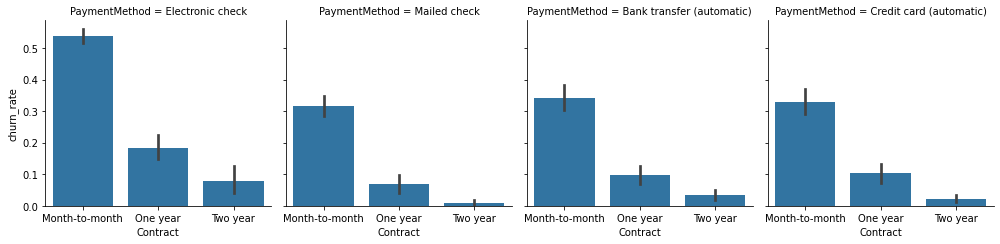

In [121]:
telco['churn_rate'] = np.where(telco['Churn']=='Yes',1,0)
grid = sns.FacetGrid(telco, col='PaymentMethod', height=3.5)
ax = grid.map(sns.barplot, 'Contract', 'churn_rate', order= ['Month-to-month', 'One year', 'Two year'])

Berdasarkan data di atas, dapat diambil kesimpulan bahwa pengguna dengan metode `kontrak Month-to-month` jauh lebih memungkinkan untuk Churn baik itu pengguna dengan metode PaymentMethod menggunakan Electronic check, Mailed check, Bank transfer (automatic), maupun Credit card (automatic).

## MonthlyCharges vs Tenure

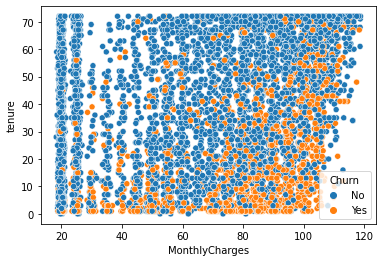

In [122]:
sns.scatterplot(data=telco, x='MonthlyCharges', y='tenure', hue='Churn')
plt.show()

Berdasarkan gambaran persebaran data di atas, dapat dikatakan bahwa mayoritas konsumen yg belum cukup lama sebagai pengguna layanan dengan tagihan bulanan yg besar lebih memungkinkan untuk Churn.

## TotalCharges vs Tenure

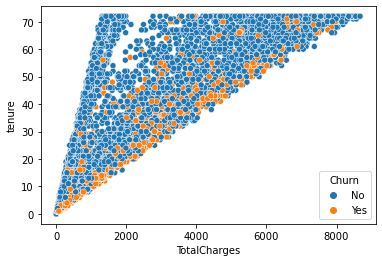

In [123]:
sns.scatterplot(data=telco, x='TotalCharges', y='tenure', hue='Churn')
plt.show()

## MonthlyCharges vs TotalCharges

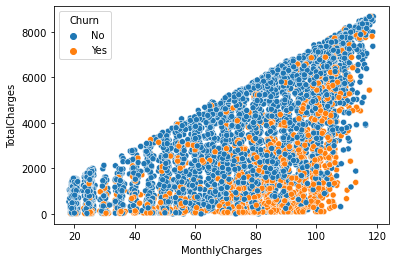

In [124]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telco, hue='Churn')
plt.show()

Berdasarkan gambaran persebaran data di atas, dapat dikatakan bahwa mayoritas konsumen yg memiliki tagihan bulanan yg besar lebih memungkinkan untuk Churn dibandingkan pengguna yg memiliki total tagihan yg besar.

# Preprocessing

In [125]:
telco.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [126]:
telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'churn_rate'],
      dtype='object')

**skema preprocess:**
1. one hot encoding : gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling
2. ordinal encoding : PaymentMethod
3. passthrough : SeniorCitizen, tenure, MonthlyCharges, TotalCharges
4. out : CustomerID (already dropped), churn_rate (yg sebelumnya dibuat pas bikin perbandingan)

In [127]:
mapping=[{'col':'PaymentMethod','mapping':{None:0,'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3, 'Credit card (automatic)':4}}]
ordinal=ce.OrdinalEncoder(mapping=mapping)

transformer=ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'), ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']),
    ('ordinal', ordinal,['PaymentMethod']),
], remainder='passthrough')

In [128]:
transformer.fit_transform(telco)

array([[0.0, 1.0, 0.0, ..., 29.85, 'No', 0],
       [1.0, 0.0, 0.0, ..., 1889.5, 'No', 0],
       [1.0, 0.0, 0.0, ..., 108.15, 'Yes', 1],
       ...,
       [0.0, 1.0, 1.0, ..., 346.45, 'No', 0],
       [1.0, 1.0, 0.0, ..., 306.6, 'Yes', 1],
       [1.0, 0.0, 0.0, ..., 6844.5, 'No', 0]], dtype=object)

# Data Splitting

In [129]:
x=telco.drop(columns=['Churn','churn_rate'])
y=np.where(telco['Churn']=='Yes',1,0)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=777)

# Data Transform

In [131]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer.fit_transform(x_test))

# Benchmark Model

**konteks:** memprediksi kemungkinan konsumen akan Churn atau tidak

* 1 = konsumen lanjut (tidak Churn)
* 0 = konsumen stop (Churn) 

FP = dibilang akan lanjut padahal stop --> mendapat tambahan biaya pengeluaran (operasional, marketing, dsb) yg tidak perlu

FN = dibilang akan stop padahal lanjut --> kehilangan sumber pemasukan

**jadi akan fokus untuk minimalisir/menekan FN dengan menggunakan Recall**

model yg dicoba (yg dicoba ini semua se-default mungkin dan sebisa mungkin yg ngga terlalu memberatkan laptop):
* logistic regression
* decision tree classifier (dtc)
* k-nearest neighbors (knn)
* random forest (rf)

In [132]:
logreg=LogisticRegression(solver='liblinear', random_state=777)
tree=DecisionTreeClassifier(max_depth=5, random_state=777)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(max_depth=5, max_features=5)
# xgb=XGBClassifier(n_estimators=200, learning_rate=0.1,max_depth=3,random_state=10)

In [133]:
models=[logreg, knn, tree, rf]
mean=[]
stdev=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)
    ])
    model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')    
    
    mean.append(model_cv.mean())
    stdev.append(model_cv.std())

In [134]:
pd.DataFrame({
    'Model':['logreg','knn','tree','rf'],
    'mean':mean,
    'stdev':stdev
})

,Model,mean,stdev
0,logreg,0.542773,0.013404
1,knn,0.440773,0.038361
2,tree,0.485709,0.057040
3,rf,0.434357,0.023598


>Disini `logreg` memiliki nilai _mean_ yg paling tinggi serta nilai _stDev_ yg paling rendah, bisa dikatakan model yg performanya paling baik dan lebih stabil adalah ketika menggunakan metode `logreg`. Untuk selanjutnya akan dilakukan optimasi model logistik pada `logreg`.

# Model Processing

In [135]:
modelLR=LogisticRegression(solver='liblinear', random_state=777)
estimator=Pipeline([
    ('preprocess',transformer),
    ('estimator', modelLR)
])

estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Paper

In [136]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1294
           1       0.64      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



## Model Properties

In [137]:
estimator[0].transformers_

[('one hot',
  OneHotEncoder(drop='first'),
  ['gender',
   'Partner',
   'Dependents',
   'PhoneService',
   'MultipleLines',
   'InternetService',
   'OnlineSecurity',
   'OnlineBackup',
   'DeviceProtection',
   'TechSupport',
   'StreamingTV',
   'StreamingMovies',
   'Contract',
   'PaperlessBilling']),
 ('ordinal',
  OrdinalEncoder(cols=['PaymentMethod'],
                 mapping=[{'col': 'PaymentMethod',
                           'mapping': {None: 0, 'Bank transfer (automatic)': 3,
                                       'Credit card (automatic)': 4,
                                       'Electronic check': 1,
                                       'Mailed check': 2}}]),
  ['PaymentMethod']),
 ('remainder', 'passthrough', [1, 4, 17, 18])]

In [138]:
estimator[0].transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Yes', 'x3_Yes', 'x4_No phone service',
       'x4_Yes', 'x5_Fiber optic', 'x5_No', 'x6_No internet service',
       'x6_Yes', 'x7_No internet service', 'x7_Yes',
       'x8_No internet service', 'x8_Yes', 'x9_No internet service',
       'x9_Yes', 'x10_No internet service', 'x10_Yes',
       'x11_No internet service', 'x11_Yes', 'x12_One year',
       'x12_Two year', 'x13_Yes'], dtype=object)

In [139]:
estimator[0].transformers_[1][1].get_feature_names()

['PaymentMethod']

In [140]:
num_features=list(x_train.dtypes[x_train.dtypes!=object].index)
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [141]:
features=list(list(estimator[0].transformers_[0][1].get_feature_names())+estimator[0].transformers_[1][1].get_feature_names()+num_features)
features

['x0_Male',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'x4_No phone service',
 'x4_Yes',
 'x5_Fiber optic',
 'x5_No',
 'x6_No internet service',
 'x6_Yes',
 'x7_No internet service',
 'x7_Yes',
 'x8_No internet service',
 'x8_Yes',
 'x9_No internet service',
 'x9_Yes',
 'x10_No internet service',
 'x10_Yes',
 'x11_No internet service',
 'x11_Yes',
 'x12_One year',
 'x12_Two year',
 'x13_Yes',
 'PaymentMethod',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

## Feature Importances

In [142]:
modelLR.fit(x_train_preprocessed, y_train)
importances = pd.DataFrame(data={
    'features': features,
    'importance': abs(modelLR.coef_[0])
})
importances = importances.sort_values(by='importance', ascending=False)

In [143]:
imp=pd.DataFrame({'importance':abs(modelLR.coef_[0])}, index=list(features))
imp.sort_values(by='importance',ascending=False)

,importance
x12_Two year,0.637371
x6_Yes,0.614330
x5_Fiber optic,0.542360
x9_Yes,0.499903
x3_Yes,0.380463
x13_Yes,0.370834
x12_One year,0.368340
SeniorCitizen,0.301623
x4_No phone service,0.291094
x7_Yes,0.252018


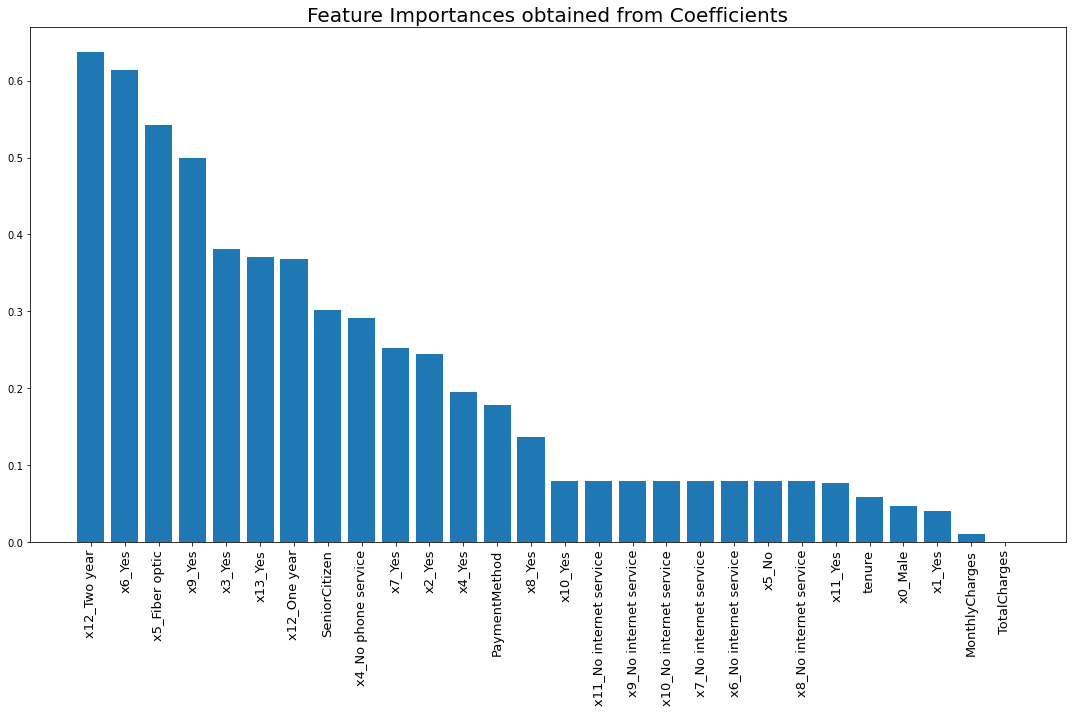

In [144]:
plt.figure(figsize=(15,10))

bars=importances['features']
heights=importances['importance']

plt.bar(bars, heights)
plt.title('Feature Importances obtained from Coefficients', size=20)

plt.xticks(size=13,rotation=90)
plt.tight_layout()
plt.show()

>Berdasarkan chart ini, semakin besar nilai koefisiennya baik dalam arah positif maupun negatif (disini sengaja dijadikan nilai absolut untuk lebih mudah interpretasikannya) memiliki arti semakin besar pengaruhnya terhadap hasil prediksi model.

## Model Tuning

In [145]:
modelLR=LogisticRegression(solver='liblinear', random_state=777)
estimator=Pipeline([
    ('preprocess',transformer),
    ('estimator', modelLR)
])

estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Paper

In [146]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one hot', OneHotEncoder(drop='first'),
                                    ['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'PaymentMethod',
                                                             'mapping': {None: 0,
                                                                         'Bank transfer (automatic)': 3,
                                 

In [147]:
hyperparam_space={'estimator__C':[100,10,1,0.1,0.001],
                  'estimator__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'estimator__penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'estimator__max_iter': [100,500,1000],
                  'estimator__class_weight':['dict','balanced']
                 }

In [148]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall',
    n_jobs=-1
)

In [149]:
grid_search.fit(x_train, y_train)

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.49928317 0.55133198
 0.53849009        nan 0.50784443 0.49928317        nan        nan
        nan        nan        nan 0.55133198 0.54561515        nan
 0.50784443 0.49928317        nan        nan        nan        nan
 0.51569395 0.55133198 0.54134215        nan 0.5278241  0.51569395
        nan        nan        nan        nan        nan 0.55133198
 0.54204881        nan 0.5278241  0.51569395        nan        nan
        nan        nan 0.5278241  0.55133198 0.54134215        nan
 0.50998729 0.5278241         nan        nan        nan        nan
        nan 0.55133198 0.54204881        nan 0.50998729 0.5278241
        nan        nan 0.79812659        nan 0.80312659 0.79598627
 0.77387646 0.79598882 0.80454753 0.80312659        nan        nan
        nan        nan        nan 0.79598

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetS

In [150]:
print('best score:',grid_search.best_score_)
print('best parameters:',grid_search.best_params_)

best score: 0.8045500762582612
best parameters: {'estimator__C': 0.001, 'estimator__class_weight': 'balanced', 'estimator__max_iter': 100, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}


## Before vs After tuning

### Before

In [151]:
from sklearn.metrics import recall_score

In [152]:
model=LogisticRegression(solver='liblinear', random_state=777)
estimator=Pipeline([
    ('preprocess',transformer),
    ('estimator', model)
])

estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Paper

In [153]:
estimator.fit(x_train,y_train)
y_predBef=estimator.predict(x_test)
print(classification_report(y_test,y_predBef))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1294
           1       0.64      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [154]:
recall_score(y_test, y_predBef)

0.5224839400428265

>**Sebelum dilakukan tuning**, performa model memiliki nilai sebesar `52.24%`

### After

In [155]:
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Paper

In [156]:
y_predAf=best_model.predict(x_test)

In [157]:
print(classification_report(y_test, y_predAf))

              precision    recall  f1-score   support

           0       0.90      0.59      0.71      1294
           1       0.41      0.81      0.55       467

    accuracy                           0.65      1761
   macro avg       0.66      0.70      0.63      1761
weighted avg       0.77      0.65      0.67      1761



In [158]:
recall_score(y_test, y_predAf)

0.8137044967880086

> **Setelah dilakukan tuning**, performa model mengalami peningkatan yg cukup signifikan dari `52.24%` menjadi `81.37%`

tapi nilai accuracy menurun dari 80% menjadi 65%